# **Waze Project**
**Regression analysis: Simplify complex data relationships**

# **Regression modeling**

In this activity, we will build a binomial logistic regression model to predict user churn based on a variety of variables. Because we want to predict user churn, the binomial logistic regression model will be our confirmation for how best to proceed with the ML algorithm in the final phase of the project. 
<br/>

**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.
<br/>

*This analysis has three parts:*

**Part 1:** EDA & Checking Model Assumptions

**Part 2:** Model Building and Evaluation

**Part 3:** Interpreting Model Results

<br/>

# **Build a regression model**

## **Part 1. EDA & Checking Model Assumptions**
### **Step1: Import packages and dataset**

In [1]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset

df = pd.read_csv('waze_dataset.csv')

### **Step 2a. Explore data with EDA**

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.

Start with `.shape` and `info()`.

In [3]:
df.shape

(14999, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
df.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

There are 14999 rows data with 700 rows with missing data. We have 13 columns data in object, float and integer data type. We may need to rewrite data type later based on the columns we choose.

In [6]:
# Overview data
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


ID column is like the index column which is not needed for our analysis so we can drop it.

In [7]:
# drop the ID column and save data into a new dataframe df_dropped
df_dropped = df.drop(columns = 'ID')


From observation, the `label` column seems to be a good dependent variable for our analysis. This is the reason why we are chosing binomial regression model in this analysis. Now, let's check the class balance of the dependent variable, `label`.

In [8]:
df_dropped['label'].value_counts(normalize = True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

In [9]:
df_dropped.describe(include ='all')


,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
count,14299,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
freq,11763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9672
mean,NaN,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,NaN
std,NaN,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,NaN,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,NaN
25%,NaN,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,NaN
50%,NaN,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,NaN
75%,NaN,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,NaN


From the statistical summary, we can notice that `sessions`, `total_sessions`, `drives`,`total_navigations_fav1`,`total_navigations_fav2`,`driven_km_drives` and `duration_minutes_drives` seem to have outliers. 

### **Step 2b. Create features**

Create features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

#### **`km_per_driving_day`**

From earlier EDA that churn rate correlates with distance driven per driving day in the last month. It might be helpful to engineer a feature that captures this information.

1. Create a new column called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [10]:
# 1. Create `km_per_driving_day` column
df_dropped['km_per_driving_day'] = round(df_dropped['driven_km_drives']/df_dropped['driving_days'],2)

# 2. Call `describe()` on the new column
df_dropped['km_per_driving_day'].describe()

count    14999.000
mean           inf
std            NaN
min          3.020
25%        167.280
50%        323.150
75%        757.925
max            inf
Name: km_per_driving_day, dtype: float64

Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. We can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [11]:
# 1. Convert infinite values to zero
df_dropped.loc[df_dropped['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0 

# 2. Confirm that it worked
df_dropped['km_per_driving_day'].describe()

count    14999.000000
mean       578.963134
std       1030.094401
min          0.000000
25%        136.240000
50%        272.890000
75%        558.690000
max      15420.230000
Name: km_per_driving_day, dtype: float64

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

In [12]:
# Create `professional_driver` column
df_dropped['professional_driver'] = np.where((df_dropped['drives']>= 60)&(df_dropped['driving_days']>= 15), 1,0)

Perform a quick inspection of the new variable.

1. Check the count of professional drivers and non-professionals

2. Within each class (professional and non-professional) calculate the churn rate

In [13]:
# 1. Check count of professionals and non-professionals
print(df_dropped['professional_driver'].value_counts())

# 2. Check in-class churn rate
print(df_dropped.groupby(by =df_dropped['professional_driver'])['label'].value_counts(normalize = True))

0    12405
1     2594
Name: professional_driver, dtype: int64
professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: label, dtype: float64


The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

### **Step 3a. Preparing variables**

Call `info()` on the dataframe to check the data type of the `label` variable and to verify if there are any missing values.

In [14]:
df_dropped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int64  
dtypes: float64(4), int64(8

Because we know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [15]:
# Drop rows with missing data in `label` column
df_dropped.dropna(inplace=True)

In [16]:
# Check if null values are removed
df_dropped.isna().sum()

label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
km_per_driving_day         0
professional_driver        0
dtype: int64

#### **Impute outliers**

We rarely want to drop outliers. 

Previously, we determined that seven of the variables had clear signs of containing outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

For this analysis, impute the outlying values for these columns. Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.

In [17]:
# Impute outliers
cols = ['sessions', 'drives','total_sessions','total_navigations_fav1','total_navigations_fav2','driven_km_drives','duration_minutes_drives']
for i in cols:
    df_dropped.loc[df_dropped[i]>df_dropped[i].quantile(0.95),i] = df_dropped[i].quantile(0.95)

# Check imputed results
df_dropped.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942419,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254521,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.165000,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.300000,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.020000,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.230000,1.000000


#### **Encode categorical variables**

Change the data type of the `label` column to be binary. This change is needed to train a logistic regression model.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` as to not overwrite the original `label` variable.

In [18]:
# Create binary `label2` column
df_dropped['label2'] = np.where(df_dropped['label'] == 'retained', 0 , 1)

### **Step 3b. Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, we assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

#### **Collinearity**

Check the correlation among predictor variables. First, generate a correlation matrix.

In [19]:
# Generate a correlation matrix
df_dropped.corr(method ='pearson')

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


Now, plot a correlation heatmap.

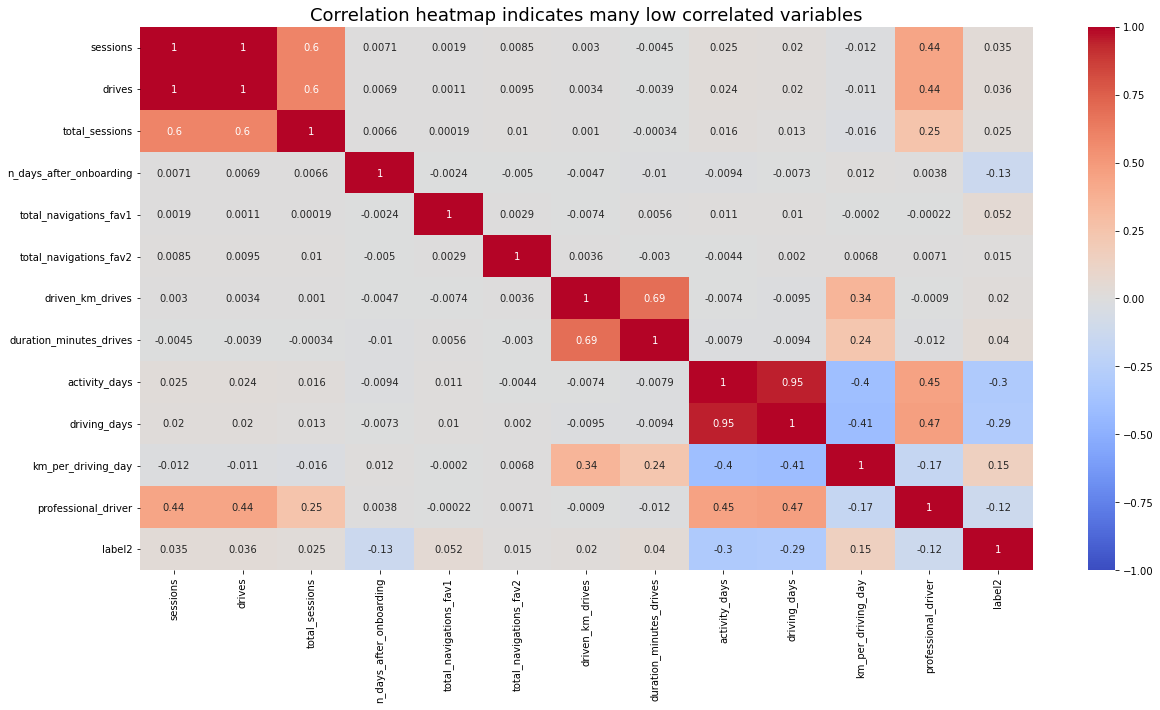

In [20]:
# Plot correlation heatmap
plt.figure(figsize =(20,10))
sns.heatmap(df_dropped.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show()


`driving_days` is multicolinear with `activity_days`. `drives` is multicolinear with `sessions`. 

### **Step 3c. Create dummies (if necessary)**

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [21]:
# Create new `device2` variable
df_dropped['device2'] = np.where(df_dropped['device'] == 'Android', 0,1)

## **Part 2. Model Building and Evaluation**
### **Step 3d. Model building**

#### **Assign predictor variables and target**

To build our model we need to determine what X variables we want to include in our model to predict our
target&mdash;`label2`.

Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [22]:
# Isolate predictor variables
X = df_dropped.drop(columns = ['label','label2','device','sessions','driving_days'])

Now, isolate the dependent (target) variable. Assign it to a variable called `y`.

In [23]:
# Isolate target variable
y=df_dropped[['label2']]

#### **Split the data**

Split out the Holdout test data. 

Because the target class is imbalanced (82% retained vs. 18% churned), we want to make sure that we don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [24]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify =y, random_state = 42)

In [25]:
# Overview train predictors
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
152,108,186.192746,3116,243,124,8898.716275,4668.180092,24,612.31,1,1
11899,2,3.487590,794,114,18,3286.545691,1780.902733,5,3286.55,0,1
10937,139,347.106403,331,4,7,7400.838975,2349.305267,15,616.74,0,0
669,108,455.439492,2320,11,4,6566.424830,4558.459870,18,410.40,1,1
8406,10,89.475821,2478,135,0,1271.248661,938.711572,27,74.78,0,1


Fit the logistric regression model with no panelty whose default value is l2 and iterate 500 times to find the best parameters. 

In [26]:
clf = LogisticRegression(penalty = 'none', max_iter = 500).fit(X_train, y_train)

In [27]:
for col, i in zip(X.columns, clf.coef_[0]):
    print(f"{col}: {i}")

drives: 0.0019099711639665965
total_sessions: 0.00033011101757801425
n_days_after_onboarding: -0.000406399822502812
total_navigations_fav1: 0.0012300567331944622
total_navigations_fav2: 0.0009232202346014049
driven_km_drives: -1.4862356116036488e-05
duration_minutes_drives: 0.00010915104718882124
activity_days: -0.10604459342287989
km_per_driving_day: 1.8214813974316232e-05
professional_driver: -0.001528676888875106
device2: -0.0010414272601824144


Call the model's `intercept_` attribute to get the intercept of the model.

In [28]:
clf.intercept_

array([-0.00170678])

#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

In [29]:
# Get the predicted probabilities of the training data
traning_probabilities = clf.predict_proba(X_train)
traning_probabilities

array([[0.93969446, 0.06030554],
       [0.61973686, 0.38026314],
       [0.76454707, 0.23545293],
       ...,
       [0.91909123, 0.08090877],
       [0.85093466, 0.14906534],
       [0.93517021, 0.06482979]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [33]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()
# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1]/prob[0]) for prob in traning_probabilities]

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `activity_days`.

In [36]:
col_list =list(logit_data.columns)

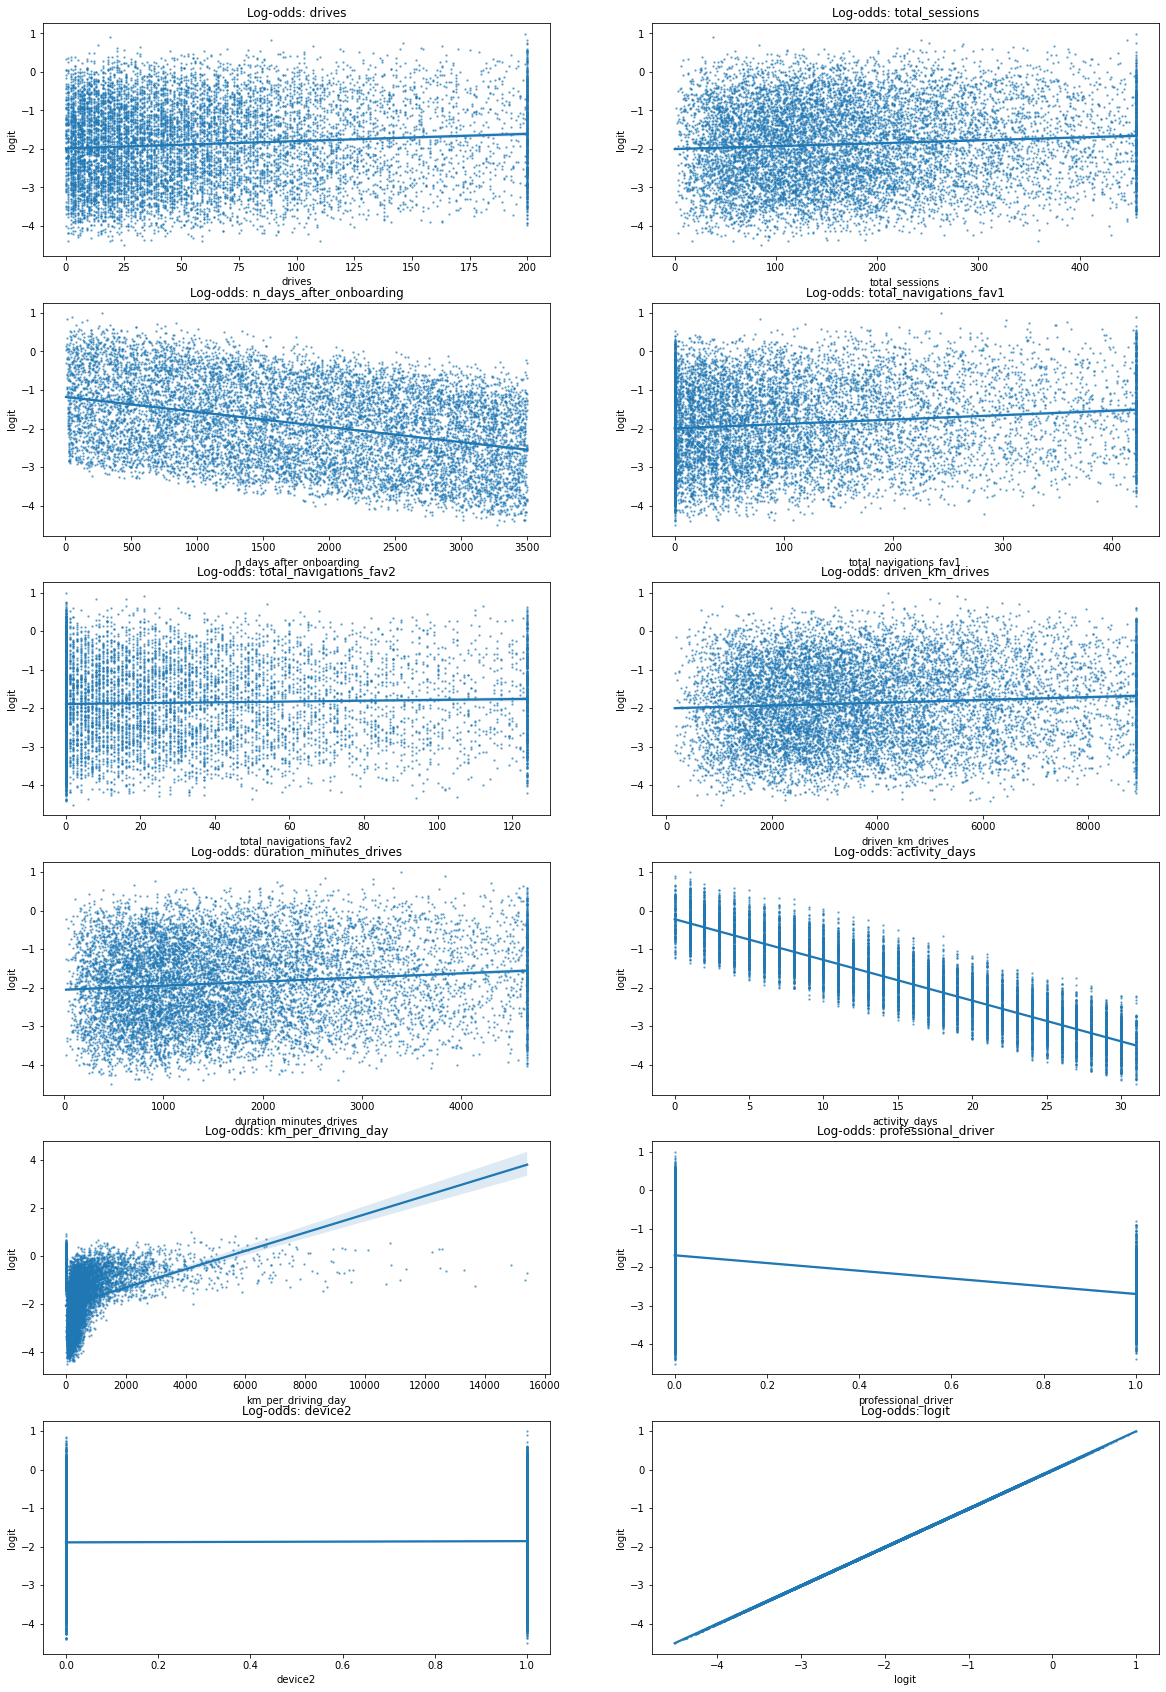

In [37]:
# Plot regplot of all other variables and log-odds

fig, axes = plt.subplots(6, 2, figsize = (20,30))

axes = axes.flatten()

for i in range(len(col_list)):
    sns.regplot(x=col_list[i], y='logit', data=logit_data, ax=axes[i],scatter_kws={'s': 2, 'alpha': 0.5})
    axes[i].set_title('Log-odds: ' + col_list[i])

Except the `activity_days` and `days_after_onboarding`, we cannot identify linear relationships among the rest predictors and logit of probability that `label` is churned. This indicates that our current model may not be the best fit for the data. Let's check test results.

## **Part 3. Interpreting Model Results**
### **Step 4a. Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted. However, the linearity is not met for all predictors. Let's make prediction on test data to check how this model fit.


In [86]:
# Generate predictions on X_test
y_pred = clf.predict(X_test)

Calculate accuracy. The target variable is imbalanced (82% retained and 18% churned) so accuracy is not the best metrics to evaluate this model.

In [88]:
# Score the model (accuracy) on the test data
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Model Accuracy:{}'.format(accuracy))

Model Accuracy:0.8237762237762237


### **Step 5b. Show results with a confusion matrix**

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [89]:
cm = metrics.confusion_matrix(y_test, y_pred)

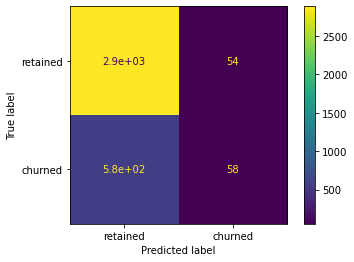

In [96]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix =cm, display_labels = ['retained', 'churned'])
disp.plot()

In [98]:
# Calculate precision 
precision = metrics.precision_score(y_test, y_pred)
print('Model Precision:{}'.format(precision))

Model Precision:0.5178571428571429


In [99]:
# Calculate recall 
recall = metrics.recall_score(y_test, y_pred)
print('Model Recall:{}'.format(recall))

Model Recall:0.0914826498422713


In [102]:
# Create a classification report
target_labels = ['retained', 'churned']
print(metrics.classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

### **Step 5: Visualize feature importance**

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [104]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, clf.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('drives', 0.0019130733119597126),
 ('total_navigations_fav1', 0.0012315951464596116),
 ('total_navigations_fav2', 0.0009309098766247432),
 ('total_sessions', 0.0003278743931579128),
 ('duration_minutes_drives', 0.00010910185253677673),
 ('km_per_driving_day', 1.8236281854360214e-05),
 ('driven_km_drives', -1.4875932883015978e-05),
 ('n_days_after_onboarding', -0.00040648942612658427),
 ('device2', -0.0010412374321597303),
 ('professional_driver', -0.0015286734132507042),
 ('activity_days', -0.1060341898140018)]

Text(0.5, 1.0, 'Feature importance')

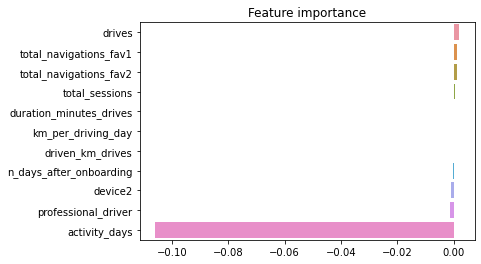

In [105]:
# Plot the feature importances
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance')

### **Step 4c. Conclusion**
 

`activity_days` was by far the most important feature in the model. It had a negative correlation with user churn. This was not surprising, as this variable was very strongly correlated with driving_days, which was known from EDA to have a negative correlation with churn.

We expected to see if `km_per_driving_day` would be a strong predictor since it reveals the strongest positive correlation in the heatmap with the label2. In the model, it was the second-least-important variable.

As made by the pool recall score 9%, this model is not a strong enough predictor for user churn. 
Linearity assumption is not met by some predictors which also indicates a not good model fit.

To imporve this model, we can try to 

 - Create some new features like `professional_drive` which is the third important feature in this prediction model.
 - Scale predictor variables or transform the predictors.
 - Reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features.

It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs.
